<a href="https://colab.research.google.com/github/Sharifa-Mohammedi/AI-ML/blob/main/Colon_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**


In [148]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# For feature importance analysis
import shap


In [ ]:
dataset1 = pd.read_csv('/content/dataset_1_colon_cancer.csv')
dataset1

In [150]:
dataset2 = pd.read_csv('/content/dataset_2_colon_cancer.csv')
dataset2

,Tumor Grade,Biopsy Result,Lymph Node Involvement,Bowel Obstruction,Smoking History,Type of Colon Cancer
0,3,Positive,Yes,Yes,Non-Smoker,3
1,3,Negative,Yes,Yes,Smoker,2
2,2,Negative,No,No,Non-Smoker,3
3,1,Negative,Yes,No,Smoker,2
4,1,Negative,No,No,Non-Smoker,2
...,...,...,...,...,...,...
95,3,Negative,Yes,Yes,Smoker,2
96,3,Positive,Yes,Yes,Smoker,3
97,3,Negative,Yes,Yes,Smoker,2
98,3,Negative,Yes,Yes,Smoker,3


In [151]:
dataset1.columns

Index(['AGE', 'CEA Level', 'Colonoscopy Result', 'Polyp Size (mm)',
       'Family History', 'Type of Colon Cancer'],
      dtype='object')

In [152]:
dataset2.columns

Index(['Tumor Grade', 'Biopsy Result', 'Lymph Node Involvement',
       'Bowel Obstruction', 'Smoking History', 'Type of Colon Cancer'],
      dtype='object')

**Exploratory Data Analysis (EDA)**

In [153]:
print(dataset1.info())
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AGE                   300 non-null    int64  
 1   CEA Level             300 non-null    float64
 2   Colonoscopy Result    300 non-null    object 
 3   Polyp Size (mm)       300 non-null    float64
 4   Family History        300 non-null    object 
 5   Type of Colon Cancer  300 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Tumor Grade             100 non-null    int64 
 1   Biopsy Result           100 non-null    object
 2   Lymph Node Involvement  100 non-null    object
 3   Bowel Obstruction       100 non-null    object
 4   

In [154]:
print(dataset1.isnull().sum())
print(dataset2.isnull().sum())

AGE                     0
CEA Level               0
Colonoscopy Result      0
Polyp Size (mm)         0
Family History          0
Type of Colon Cancer    0
dtype: int64
Tumor Grade               0
Biopsy Result             0
Lymph Node Involvement    0
Bowel Obstruction         0
Smoking History           0
Type of Colon Cancer      0
dtype: int64


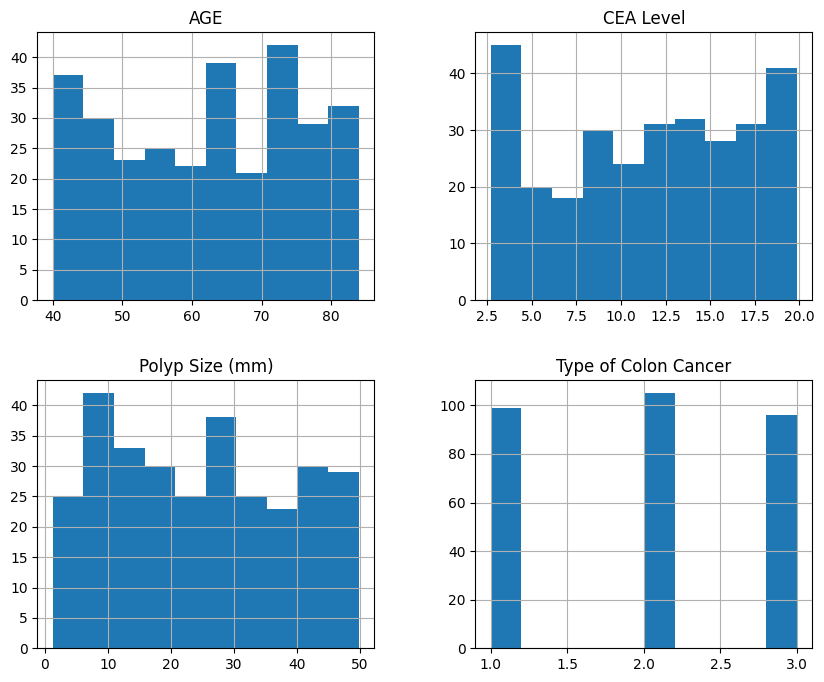

<Axes: >

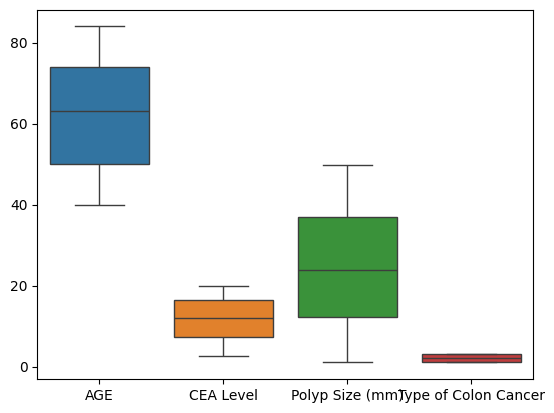

In [155]:
dataset1.hist(figsize=(10, 8))
plt.show()

sns.boxplot(data=dataset1)

<Axes: xlabel='Colonoscopy Result', ylabel='count'>

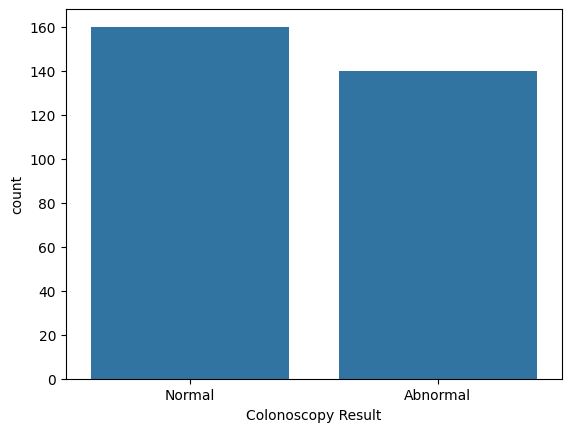

In [156]:
sns.countplot(x='Colonoscopy Result', data=dataset1)

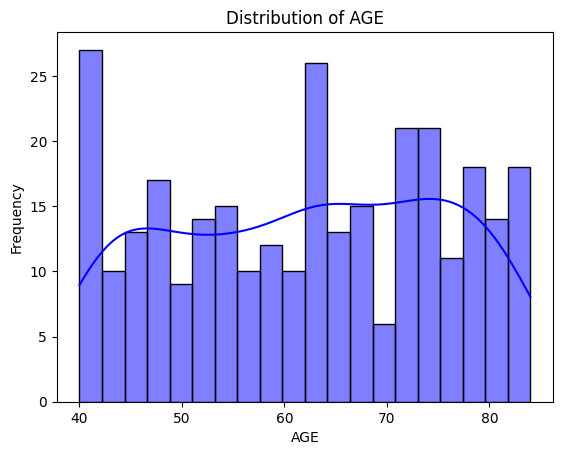

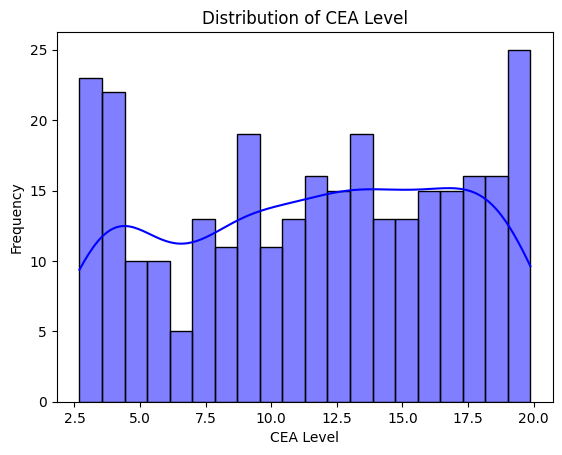

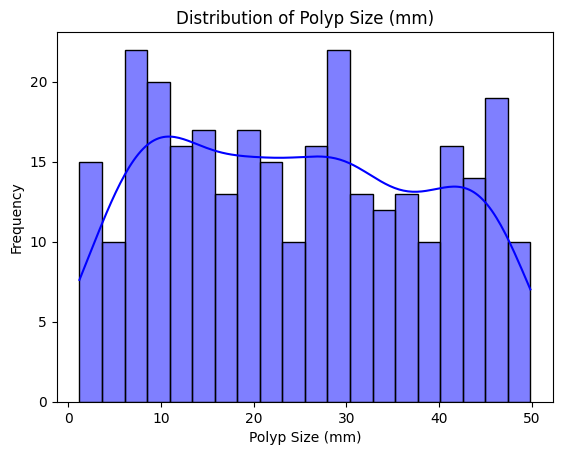

In [157]:
# List of numerical columns to plot
numerical_cols = ['AGE', 'CEA Level', 'Polyp Size (mm)']

for col in numerical_cols:
    sns.histplot(dataset1[col], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

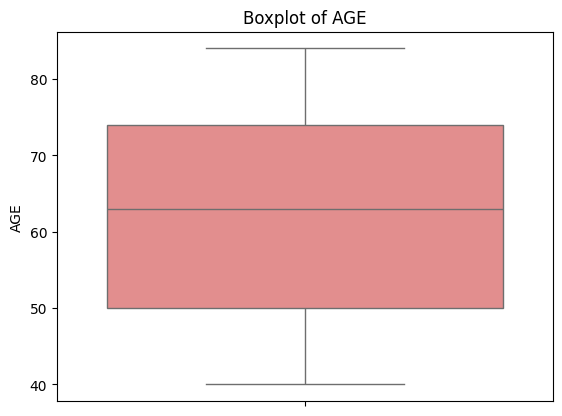

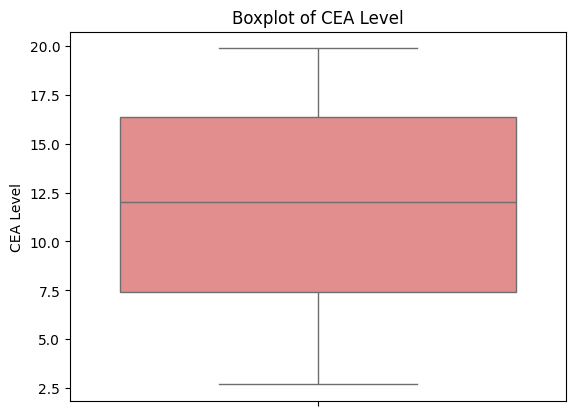

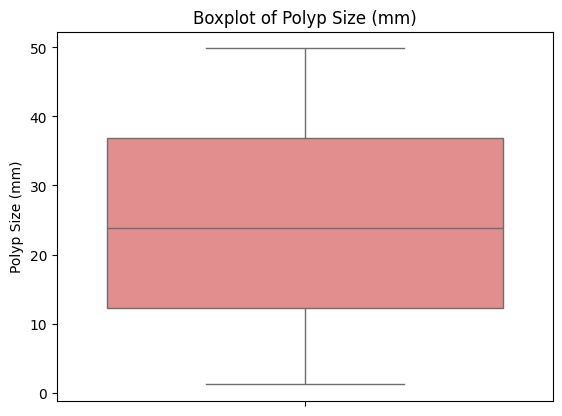

In [158]:
for col in numerical_cols:
    sns.boxplot(y=dataset1[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

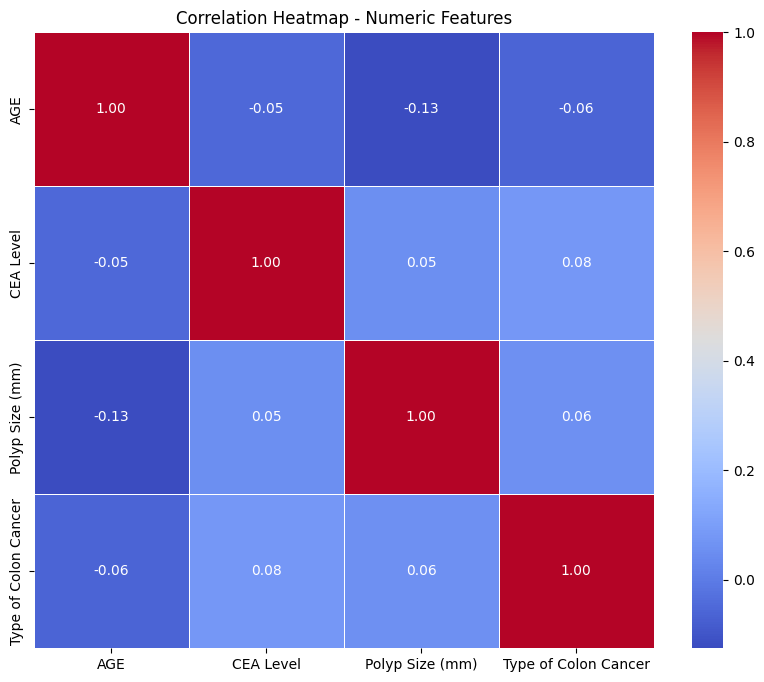

In [159]:
# Select only numeric columns for correlation
numeric_cols = dataset1.select_dtypes(include=['number']).columns
corr_matrix = dataset1[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Numeric Features')
plt.show()


<ipython-input-160-71f0be395da1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of Colon Cancer', data=dataset1, palette='cool')


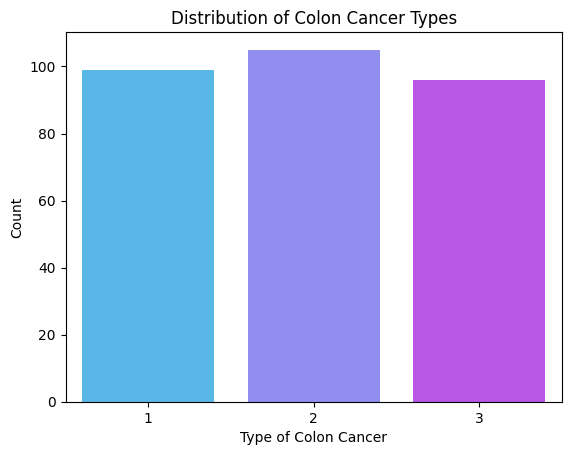

In [160]:
sns.countplot(x='Type of Colon Cancer', data=dataset1, palette='cool')
plt.title('Distribution of Colon Cancer Types')
plt.xlabel('Type of Colon Cancer')
plt.ylabel('Count')
plt.show()


# ** Data Preprocessing**

In [161]:
merged_data = pd.concat([dataset1.drop('Type of Colon Cancer', axis=1), dataset2], axis=1)


In [162]:
df=merged_data


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     300 non-null    int64  
 1   CEA Level               300 non-null    float64
 2   Colonoscopy Result      300 non-null    object 
 3   Polyp Size (mm)         300 non-null    float64
 4   Family History          300 non-null    object 
 5   Tumor Grade             100 non-null    float64
 6   Biopsy Result           100 non-null    object 
 7   Lymph Node Involvement  100 non-null    object 
 8   Bowel Obstruction       100 non-null    object 
 9   Smoking History         100 non-null    object 
 10  Type of Colon Cancer    100 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 25.9+ KB


**Handle Missing Values:**

In [164]:
from sklearn.preprocessing import LabelEncoder




In [165]:
# Encode categorical variables
categorical_columns = ['Colonoscopy Result', 'Family History', 'Biopsy Result',
                       'Lymph Node Involvement', 'Bowel Obstruction', 'Smoking History']
for col in categorical_columns:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     300 non-null    int64  
 1   CEA Level               300 non-null    float64
 2   Colonoscopy Result      300 non-null    int64  
 3   Polyp Size (mm)         300 non-null    float64
 4   Family History          300 non-null    int64  
 5   Tumor Grade             100 non-null    float64
 6   Biopsy Result           300 non-null    int64  
 7   Lymph Node Involvement  300 non-null    int64  
 8   Bowel Obstruction       300 non-null    int64  
 9   Smoking History         300 non-null    int64  
 10  Type of Colon Cancer    100 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 25.9 KB


In [167]:
# List all float columns
float_cols = df.select_dtypes(include='float64').columns
float_cols

Index(['CEA Level', 'Polyp Size (mm)', 'Tumor Grade', 'Type of Colon Cancer'], dtype='object')

In [168]:
df[float_cols] = df[float_cols].fillna(df[float_cols].median())

In [169]:
# Convert each float column to int
df[float_cols] = df[float_cols].astype(int)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   AGE                     300 non-null    int64
 1   CEA Level               300 non-null    int64
 2   Colonoscopy Result      300 non-null    int64
 3   Polyp Size (mm)         300 non-null    int64
 4   Family History          300 non-null    int64
 5   Tumor Grade             300 non-null    int64
 6   Biopsy Result           300 non-null    int64
 7   Lymph Node Involvement  300 non-null    int64
 8   Bowel Obstruction       300 non-null    int64
 9   Smoking History         300 non-null    int64
 10  Type of Colon Cancer    300 non-null    int64
dtypes: int64(11)
memory usage: 25.9 KB


**Feature Engineering**

1. **Age and Polyp Size Interaction Feature**:

*   Rationale: Older patients may have a higher risk of developing colon cancer. Combining this with polyp size might help capture interactions between these factors.
* New Feature: Age_Polyp_Interaction = AGE * Polyp Size (mm)



In [171]:
# Creating a new feature combining Age and Polyp Size
df['Age_Polyp_Interaction'] = df['AGE'] * df['Polyp Size (mm)']


**Age Group Categorization:**
Rationale: Age could be categorized into groups (e.g., young, middle-aged, and elderly), as colon cancer risks may vary significantly across age groups.
New Feature: Age_Group (e.g., 0: Young, 1: Middle-aged, 2: Elderly)

In [172]:
# Creating a categorical feature for age groups
bins = [0, 40, 60, 100]
labels = ['Young', 'Middle-Aged', 'Elderly']
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels)


**Bowel Obstruction and Smoking History Interaction**:
Rationale: A combination of bowel obstruction and smoking history could serve as an important feature, as smoking is a risk factor for bowel diseases.
New Feature: Bowel_Smoking_Interaction = Bowel Obstruction * Smoking History

In [173]:
# Creating a new feature combining Bowel Obstruction and Smoking History
df['Bowel_Smoking_Interaction'] = df['Bowel Obstruction'] * df['Smoking History']


**umor Grade and Lymph Node Involvement Interaction**:
Rationale: Tumor grade and lymph node involvement are both critical factors in determining cancer severity. Their interaction could be an important feature.
New Feature: Tumor_Lymph_Interaction = Tumor Grade * Lymph Node Involvement

In [174]:
# Creating an interaction feature between Tumor Grade and Lymph Node Involvement
df['Tumor_Lymph_Interaction'] = df['Tumor Grade'] * df['Lymph Node Involvement']


**Polyp Size Grouping:**
Rationale: Polyp size could be categorized into small, medium, and large, as the size of polyps is linked to cancer risk.
New Feature: Polyp_Size_Group = Small, Medium, Large

In [175]:
# Creating categorical bins for Polyp Size
bins = [0, 5, 10, 50]  # Defining the bin edges
labels = ['Small', 'Medium', 'Large']  # Labels for each bin
df['Polyp_Size_Group'] = pd.cut(df['Polyp Size (mm)'], bins=bins, labels=labels)


**Creating a Risk Score**:
Rationale: A composite score based on the combination of features could serve as a new metric to represent the risk of colon cancer.
New Feature: Risk_Score = Age + Polyp Size + Tumor Grade

In [176]:
# Creating a composite risk score
df['Risk_Score'] = df['AGE'] + df['Polyp Size (mm)'] + df['Tumor Grade']


** Family History and Tumor Grade Interaction**:
 Rationale: A family history of cancer might have an impact on the severity of the tumor. Combining these two features might provide new insights.
New Feature: Family_Tumor_Interaction = Family History * Tumor Grade
python
Copy code


In [177]:
# Creating an interaction feature between Family History and Tumor Grade
df['Family_Tumor_Interaction'] = df['Family History'] * df['Tumor Grade']


**Binarizing Categorical Variables**:
Rationale: Converting categorical features like Colonoscopy Result or Biopsy Result into binary (0 or 1) features can sometimes help models capture the influence of categorical variables more clearly.
python
Copy code


In [178]:
# One-hot encoding for categorical variables if needed
df = pd.get_dummies(df, columns=['Colonoscopy Result', 'Biopsy Result', 'Smoking History'], drop_first=True)


In [179]:
df.columns

Index(['AGE', 'CEA Level', 'Polyp Size (mm)', 'Family History', 'Tumor Grade',
       'Lymph Node Involvement', 'Bowel Obstruction', 'Type of Colon Cancer',
       'Age_Polyp_Interaction', 'Age_Group', 'Bowel_Smoking_Interaction',
       'Tumor_Lymph_Interaction', 'Polyp_Size_Group', 'Risk_Score',
       'Family_Tumor_Interaction', 'Colonoscopy Result_1', 'Biopsy Result_1',
       'Biopsy Result_2', 'Smoking History_1', 'Smoking History_2'],
      dtype='object')

** Handling Outliers**:
Rationale: Outliers in columns like AGE or Polyp Size (mm) could skew the model's performance. You could try removing or capping outliers.

In [180]:
# Handling outliers by capping or removing
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

# Apply to relevant columns
cap_outliers(df, 'AGE')
cap_outliers(df, 'Polyp Size (mm)')


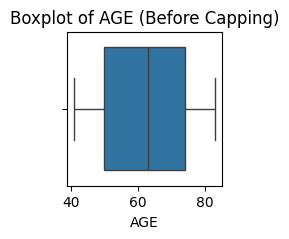

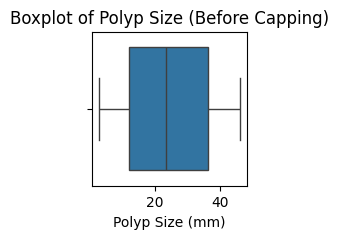

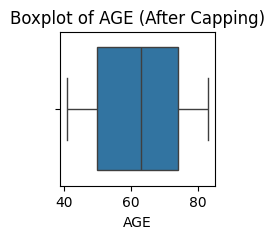

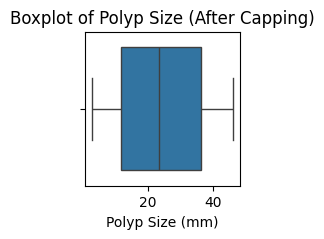

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before capping
plt.figure(figsize=(2, 2))
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of AGE (Before Capping)')
plt.show()

plt.figure(figsize=(2, 2))
sns.boxplot(x=df['Polyp Size (mm)'])
plt.title('Boxplot of Polyp Size (Before Capping)')
plt.show()

# Apply capping
cap_outliers(df, 'AGE')
cap_outliers(df, 'Polyp Size (mm)')

# After capping
plt.figure(figsize=(2, 2))
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of AGE (After Capping)')
plt.show()

plt.figure(figsize=(2, 2))
sns.boxplot(x=df['Polyp Size (mm)'])
plt.title('Boxplot of Polyp Size (After Capping)')
plt.show()


In [182]:
# Summary statistics before capping
print("Summary statistics before capping:")
print(df[['AGE', 'Polyp Size (mm)']].describe())

# Apply capping
cap_outliers(df, 'AGE')
cap_outliers(df, 'Polyp Size (mm)')

# Summary statistics after capping
print("Summary statistics after capping:")
print(df[['AGE', 'Polyp Size (mm)']].describe())


Summary statistics before capping:
              AGE  Polyp Size (mm)
count  300.000000       300.000000
mean    62.216667        24.163333
std     13.170977        13.742130
min     41.000000         3.000000
25%     50.000000        12.000000
50%     63.000000        23.500000
75%     74.000000        36.250000
max     83.000000        46.000000
Summary statistics after capping:
              AGE  Polyp Size (mm)
count  300.000000       300.000000
mean    62.216667        24.163333
std     13.170977        13.742130
min     41.000000         3.000000
25%     50.000000        12.000000
50%     63.000000        23.500000
75%     74.000000        36.250000
max     83.000000        46.000000


In [183]:
from scipy.stats import zscore

# Calculate Z-scores
df['AGE_zscore'] = zscore(df['AGE'])
df['Polyp_Size_zscore'] = zscore(df['Polyp Size (mm)'])

# Check for any Z-scores greater than 3 or less than -3
outliers_age = df[df['AGE_zscore'].abs() > 3]
outliers_polyp = df[df['Polyp_Size_zscore'].abs() > 3]

print("Outliers based on Z-score (AGE):")
print(outliers_age)

print("Outliers based on Z-score (Polyp Size):")
print(outliers_polyp)


Outliers based on Z-score (AGE):
Empty DataFrame
Columns: [AGE, CEA Level, Polyp Size (mm), Family History, Tumor Grade, Lymph Node Involvement, Bowel Obstruction, Type of Colon Cancer, Age_Polyp_Interaction, Age_Group, Bowel_Smoking_Interaction, Tumor_Lymph_Interaction, Polyp_Size_Group, Risk_Score, Family_Tumor_Interaction, Colonoscopy Result_1, Biopsy Result_1, Biopsy Result_2, Smoking History_1, Smoking History_2, AGE_zscore, Polyp_Size_zscore]
Index: []

[0 rows x 22 columns]
Outliers based on Z-score (Polyp Size):
Empty DataFrame
Columns: [AGE, CEA Level, Polyp Size (mm), Family History, Tumor Grade, Lymph Node Involvement, Bowel Obstruction, Type of Colon Cancer, Age_Polyp_Interaction, Age_Group, Bowel_Smoking_Interaction, Tumor_Lymph_Interaction, Polyp_Size_Group, Risk_Score, Family_Tumor_Interaction, Colonoscopy Result_1, Biopsy Result_1, Biopsy Result_2, Smoking History_1, Smoking History_2, AGE_zscore, Polyp_Size_zscore]
Index: []

[0 rows x 22 columns]


**Putting It All Together**:
Here’s how you can combine these new features into your dataset and use them for model training

In [184]:
# Add the new features to the dataframe
df['Age_Polyp_Interaction'] = df['AGE'] * df['Polyp Size (mm)']
df['Age_Group'] = pd.cut(df['AGE'], bins=[0, 40, 60, 100], labels=['Young', 'Middle-Aged', 'Elderly'])
df['Bowel_Smoking_Interaction'] = df['Bowel Obstruction'] * df['Smoking History_1']
df['Tumor_Lymph_Interaction'] = df['Tumor Grade'] * df['Lymph Node Involvement']
df['Polyp_Size_Group'] = pd.cut(df['Polyp Size (mm)'], bins=[0, 5, 10, 50], labels=['Small', 'Medium', 'Large'])
df['Risk_Score'] = df['AGE'] + df['Polyp Size (mm)'] + df['Tumor Grade']
df['Family_Tumor_Interaction'] = df['Family History'] * df['Tumor Grade']

# Handle categorical columns (e.g., Age Group, Polyp Size Group) with one-hot encoding if needed
df = pd.get_dummies(df, columns=['Age_Group', 'Polyp_Size_Group'], drop_first=True)

# Ensure all necessary preprocessing is done before training the model
# For example, label encoding for categorical features, scaling for numerical features, etc.


In [185]:
print(df.columns)


Index(['AGE', 'CEA Level', 'Polyp Size (mm)', 'Family History', 'Tumor Grade',
       'Lymph Node Involvement', 'Bowel Obstruction', 'Type of Colon Cancer',
       'Age_Polyp_Interaction', 'Bowel_Smoking_Interaction',
       'Tumor_Lymph_Interaction', 'Risk_Score', 'Family_Tumor_Interaction',
       'Colonoscopy Result_1', 'Biopsy Result_1', 'Biopsy Result_2',
       'Smoking History_1', 'Smoking History_2', 'AGE_zscore',
       'Polyp_Size_zscore', 'Age_Group_Middle-Aged', 'Age_Group_Elderly',
       'Polyp_Size_Group_Medium', 'Polyp_Size_Group_Large'],
      dtype='object')


**Model Building**


In [186]:
X = df.drop('Type of Colon Cancer', axis=1)
y = df['Type of Colon Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [188]:
# Standardizing the data (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training data
X_test_scaled = scaler.transform(X_test)  # Transform the testing data

In [189]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [190]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase max_iter
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**MODEL EVALUATION**

In [191]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))




Random Forest Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.81      0.89      0.85        47
           3       0.00      0.00      0.00         5

    accuracy                           0.70        60
   macro avg       0.27      0.30      0.28        60
weighted avg       0.63      0.70      0.66        60



In [192]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           1       0.50      0.38      0.43         8
           2       0.86      0.94      0.90        47
           3       0.33      0.20      0.25         5

    accuracy                           0.80        60
   macro avg       0.57      0.50      0.53        60
weighted avg       0.77      0.80      0.78        60



In [193]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV


In [194]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Using GridSearchCV for hyperparameter tuning with StratifiedKFold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5),
                           scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with the best parameters
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
print(f"Best parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred_rf = best_rf_model.predict(X_test_scaled)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Performance:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.85      0.94      0.89        47
           3       0.20      0.20      0.20         5

    accuracy                           0.75        60
   macro avg       0.35      0.38      0.36        60
weighted avg       0.68      0.75      0.71        60



In [195]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


AssertionError: Model has no `estimators_`! Have you called `model.fit`?